## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 2. Load Data

In [2]:
# Reading data from local file

df = pd.read_csv('quikr_car.csv', encoding ='ISO-8859-1')

In [3]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


## 3. Overview on Data:

In [4]:
# Checking Shape

df.shape

(892, 6)

In [5]:
# Checking Columns
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [6]:
# checking dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [7]:
# Checking duplicate values

df.duplicated().sum()

94

In [8]:
# Checking missing values

df.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

## 4. Data Cleaning:

**Creating Back Up of Dataframe**

In [9]:
backup_df = df.copy()

**i) Cleaning Column: `name`**

- The 'name' column names are inconsistance form, therefore we will consider only 1st three words.

In [10]:
# checking unique values
df['name'].unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

In [11]:
# keeping first 3 words from 'name' columns

df['name'] = df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

print(f"'name'- DataType: {df['name'].dtype}")

df.head()

'name'- DataType: object


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium,Ford,2014,"5,75,000","36,000 kms",Diesel


**ii) Cleaning Column: `company`**

- All comapny names are in cleaned format already.

In [12]:
# checking unique values
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [13]:
print(f"'company'- DataType: {df['company'].dtype}")

df.head()

'company'- DataType: object


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium,Ford,2014,"5,75,000","36,000 kms",Diesel


**iii) Cleaning Column: `year`**

- The 'year' column has many non-year values that we need to remove.
- The datatype of 'year' is 'object', that need to be converted in 'int' datatype.

In [14]:
# checking unique values
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [15]:
# We will keep only numerical values from 'year' column and remove all others

df = df[df['year'].str.isnumeric()]

df['year'] = df['year'].astype(int)

print(f"'year'- DataType: {df['year'].dtype}")

df.head()

'year'- DataType: int32


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium,Ford,2014,"5,75,000","36,000 kms",Diesel


**iv) Cleaning Column: `Price`**

- The 'Price' column has many 'Ask For Price' values that we need to remove.
- The datatype of 'Price' is 'object', that need to be converted in 'int' datatype.
- Also, we need to remove ',' (comma) from price

In [16]:
# checking unique values
df['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [17]:
# Keep only numeric values and remove where price is 'Ask For Price'

df = df[df['Price']!= 'Ask For Price'] # ignoring 'ask for price' row

df['Price']=df['Price'].str.replace(',','').astype(int)  # replacing comma & making dtype as int

print(f"'Price'- DataType: {df['Price'].dtype}") # checking dtype

df.head() 

'Price'- DataType: int32


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,"45,000 kms",Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40 kms,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,"28,000 kms",Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,"36,000 kms",Diesel
6,Ford Figo,Ford,2012,175000,"41,000 kms",Diesel


**v) Cleaning Column: `kms_driven`**

- The 'kms_driven' column has many 'kms' & 'Petrol' words with 'kms' that we need to remove, also we need to remove ',' (comma) from 'kms_driven'.
- The 'kms_driven' column has some null (NaN) values, that need to be remove.
- The datatype of 'kms_driven' is 'object', that need to be converted in 'int' datatype.


In [18]:
# checking unique values
df['kms_driven'].unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

In [19]:
# Keep only numeric values and remove where price is 'Ask For Price'

df['kms_driven']=df['kms_driven'].str.split().str.get(0).str.replace(',','')  # removing kms & # replacing commas

df=df[df['kms_driven'].str.isnumeric()] # only keep numeric values

df['kms_driven']=df['kms_driven'].astype(int)

print(f"'kms_driven'- DataType: {df['kms_driven'].dtype}") # checking dtype

df.head() 

'kms_driven'- DataType: int32


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


**vi) Cleaning Column: `fuel_type`**

- The 'fuel_type' column has some null (NaN) values, that need to be remove.

In [20]:
# checking unique values
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [21]:
# checking null(NaN) values

df = df[~df['fuel_type'].isna()]  # selecting all non-null values

print(f"'kms_driven'- DataType: {df['kms_driven'].dtype}") # checking dtype

df.head() 

'kms_driven'- DataType: int32


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


**vii) Checking outliers in DataFrame**

- Our new dataframe has some outliers, which can be seen using 'describe' function as below, and we need to remove that outliers

In [22]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [23]:
df = df[df['Price']<6000000]

df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [24]:
df.describe()

,year,Price,kms_driven
count,815.000000,8.150000e+02,815.000000
mean,2012.442945,4.017933e+05,46277.096933
std,4.005079,3.815888e+05,34318.459638
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56879.000000
max,2019.000000,3.100000e+06,400000.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        815 non-null    object
 1   company     815 non-null    object
 2   year        815 non-null    int32 
 3   Price       815 non-null    int32 
 4   kms_driven  815 non-null    int32 
 5   fuel_type   815 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.0+ KB


**vii) Giving Proper Indexing**

In [26]:
# reseting index

df = df.reset_index(drop=True)

df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


**viii) Saving Cleaned Data**

In [27]:
#df.to_csv('cleaned_quikr_car.csv')

In [28]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [29]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

## 4. EDA:

**`Distribution-of-Price`**

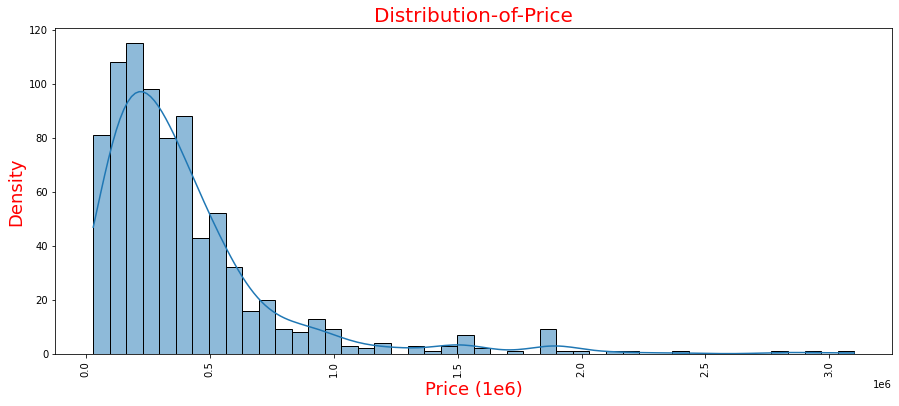

In [30]:
# Analysis on Price i.e distribution of price

fig = plt.figure(figsize=(15, 6))

sns.histplot(df['Price'], kde=True, palette="crest")

plt.title(label="Distribution-of-Price", fontsize=20, color="red")
plt.xlabel("Price (1e6)", fontsize=18, color="red")
plt.ylabel("Density", fontsize=18, color="red")
plt.xticks(rotation='vertical')

plt.show()

**`Distribution-of-Company`**

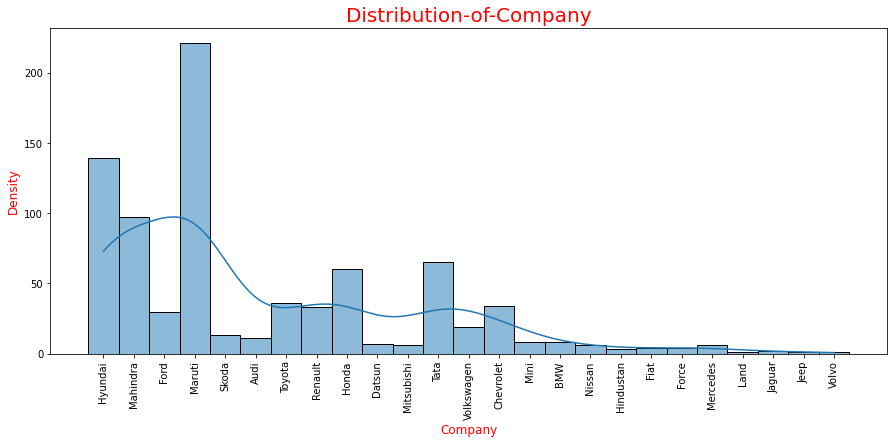

In [31]:
# Analysis on Company i.e distribution of Company

fig = plt.figure(figsize=(15, 6))

sns.histplot(df['company'], kde=True, palette="crest")

plt.title(label="Distribution-of-Company", fontsize=20, color="red")
plt.xlabel("Company", fontsize=12, color="red")
plt.ylabel("Density", fontsize=12, color="red")
plt.xticks(rotation='vertical')

plt.show()

**`Distribution-of-fuel_type`**

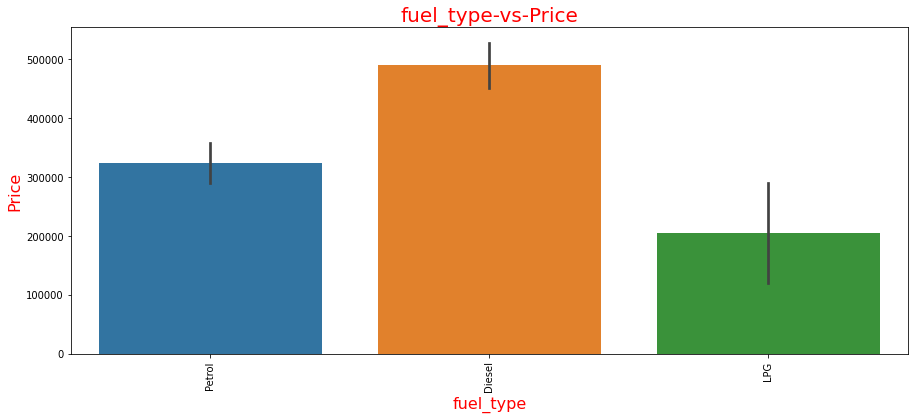

In [32]:
# Ploting Ips vs price plot

snsfig = plt.figure(figsize=(15, 6))

sns.barplot(x = df['fuel_type'], y = df['Price'])

plt.title(label="fuel_type-vs-Price", fontsize=20, color="red")
plt.xlabel("fuel_type", fontsize=16, color="red")
plt.ylabel("Price", fontsize=16, color="red")
plt.xticks(rotation='vertical')

plt.show()

**`Company-Vs-Price`**

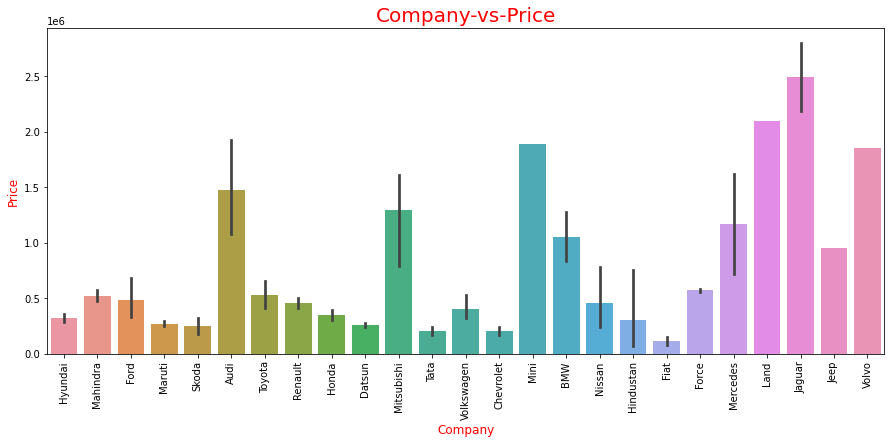

In [33]:
# Ploting company vs price plot

snsfig = plt.figure(figsize=(15, 6))

sns.barplot(x = df['company'], y = df['Price'])

plt.title(label="Company-vs-Price", fontsize=20, color="red")
plt.xlabel("Company", fontsize=12, color="red")
plt.ylabel("Price", fontsize=12, color="red")
plt.xticks(rotation='vertical')

plt.show()

## 5. Model building:

**`i) Spliting Dataframe`**

In [34]:
# spliting data into independent & dependent variable

X=df[['name','company','year','kms_driven','fuel_type']]
y=df['Price']

In [35]:
# checking shape

print(f"X-shape: {X.shape}")

print(f"y-shape: {y.shape}")

X-shape: (815, 5)
y-shape: (815,)


**`ii) Spliting into train & test`**

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [37]:
# checking shape

print(f"Train Data Shape:")
print(f"\tX_train-shape: {X_train.shape}")
print(f"\ty_train-shape: {y_train.shape}")

print(f"\nTest Data Shape:")
print(f"\tX_train-shape: {X_test.shape}")
print(f"\ty_train-shape: {y_test.shape}")

Train Data Shape:
	X_train-shape: (652, 5)
	y_train-shape: (652,)

Test Data Shape:
	X_train-shape: (163, 5)
	y_train-shape: (163,)


**`iii) Using Linear Regression`**

In [38]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

**`iv) One-HOT Encoding`**

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score,mean_absolute_error

In [40]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

**`v) Column Transformer`**

In [41]:
from sklearn.compose import make_column_transformer

In [42]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']), remainder='passthrough')

**`vi) PipeLine`**

In [43]:
pipe=make_pipeline(column_trans,lr)

**`vii) Fiting Model`**

In [44]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

**`viii) Predictions`**

In [45]:
y_pred=pipe.predict(X_test)

**`ix) R2-Score`**

In [46]:
r2_score(y_test,y_pred)

0.6841132749520658

**`x) Finding Higher r2-score using rnadom-state`**

In [47]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [48]:
# checking higher score

print(f"Random-State: {np.argmax(scores)}")
print(f"R2-Score: {scores[np.argmax(scores)]}")


Random-State: 302
R2-Score: 0.8991181549156528


- The model has higher R2-score for random_state=302, therefore using this to create pipeline.

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8991181549156528

## 6. Model Prediction During Production:

In [50]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([456582.23975675])

## 7. Pickle File Genearation:

In [51]:
import pickle

pickle.dump(pipe,open('LR_Model.pkl','wb'))
